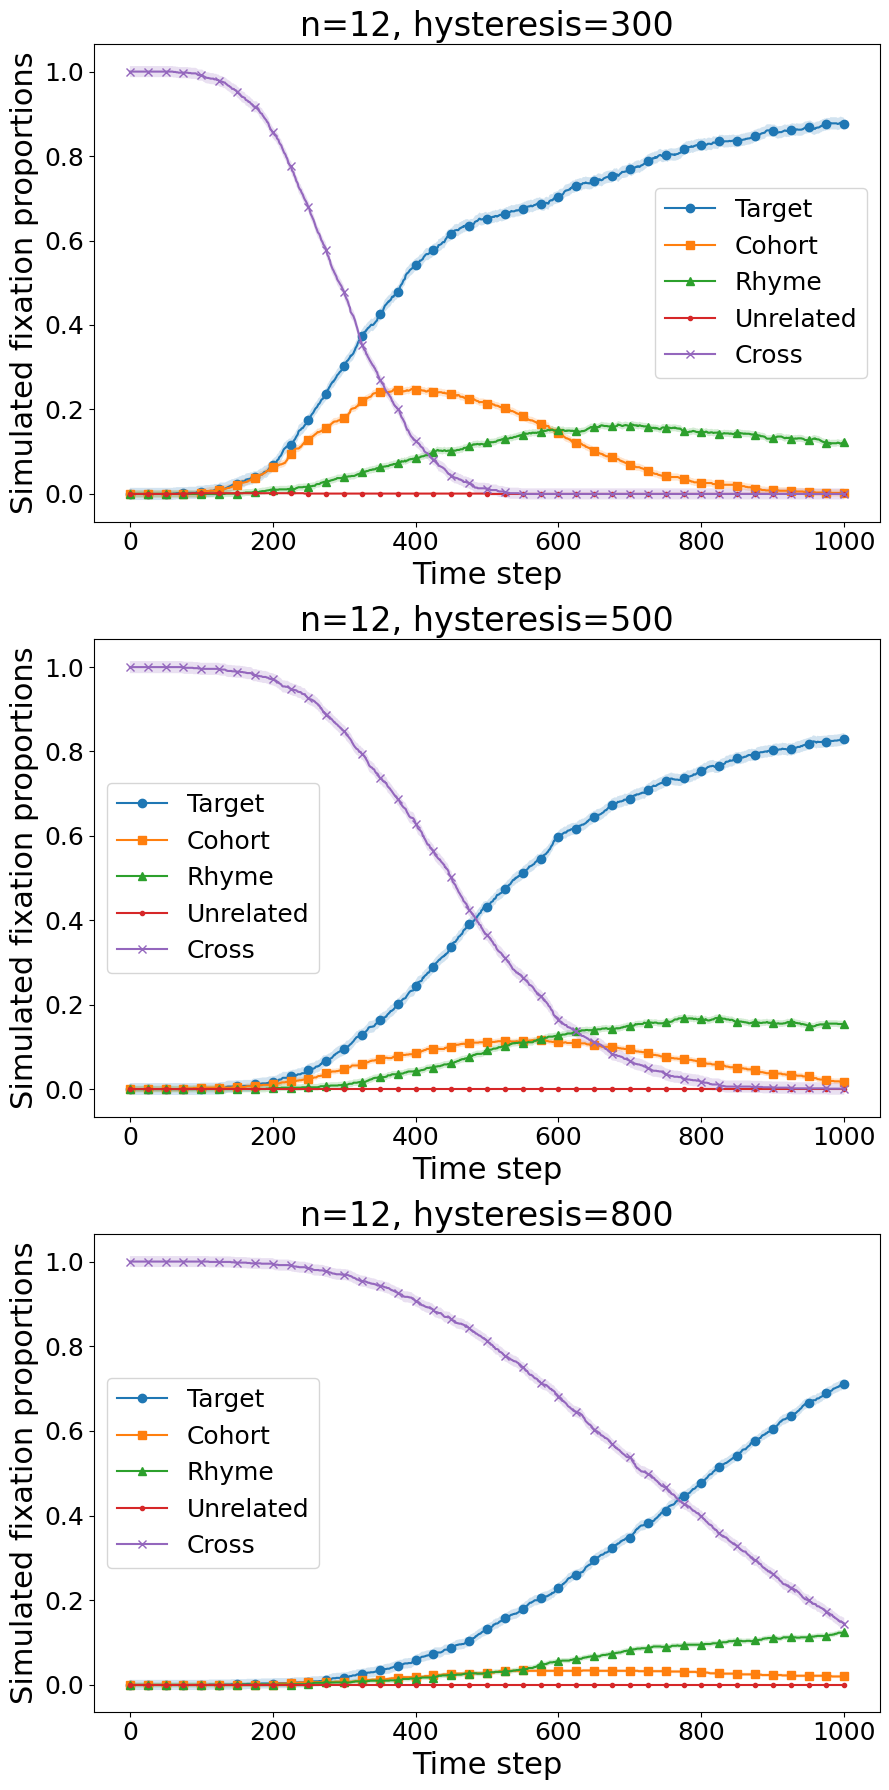

Saved plot to PNG/fig10_sim2_comparison_plot_3panels.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def extract_hysteresis_value(filename):
    """Extract the hysteresis value from the filename."""
    match = re.search(r'h(\d+)', filename)
    if match:
        return int(match.group(1))
    else:
        raise ValueError(f"Could not extract hysteresis value from filename: {filename}")

def read_and_plot_three_csv(csv_file1, csv_file2, csv_file3, output_file):
    # Read the CSV files into DataFrames
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    df3 = pd.read_csv(csv_file3)

    # Extract the hysteresis values from the filenames
    hysteresis1 = extract_hysteresis_value(csv_file1)
    hysteresis2 = extract_hysteresis_value(csv_file2)
    hysteresis3 = extract_hysteresis_value(csv_file3)

    # Define item types and markers
    markers = {"Target": "o", "Cohort": "s", "Rhyme": "^", "Unrelated": ".", "Cross": "x"}  # Define markers for different item types
    item_types = ["Target", "Cohort", "Rhyme", "Unrelated", "Cross"]  # List of item types

    # Define custom font sizes
    title_fontsize = 24
    axis_label_fontsize = 22
    tick_labelsize = 18
    legend_fontsize = 18
    annotate_fontsize = 32

    # Create a 3-panel plot (1 column, 3 rows)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 18))

    # Panel A: Plot data from the first CSV
    for item in item_types:
        subset = df1[df1['Item Type'] == item]
        mean_values = subset['Mean']
        error = subset['SEM']
        axes[0].fill_between(subset['Time step'], mean_values - error, mean_values + error, alpha=0.2)
        axes[0].plot(subset['Time step'], mean_values, label=item, marker=markers.get(item, ''), markevery=25)
    axes[0].set_title(f'n=12, hysteresis={hysteresis1}', fontsize=title_fontsize)
    axes[0].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[0].set_ylabel('Simulated fixation proportions', fontsize=axis_label_fontsize)
    axes[0].tick_params(axis='both', labelsize=tick_labelsize)
    axes[0].legend(fontsize=legend_fontsize)
    # axes[0].annotate(f'Hysteresis: {hysteresis1}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=annotate_fontsize, fontweight='bold', va='top')

    # Panel B: Plot data from the second CSV
    for item in item_types:
        subset = df2[df2['Item Type'] == item]
        mean_values = subset['Mean']
        error = subset['SEM']
        axes[1].fill_between(subset['Time step'], mean_values - error, mean_values + error, alpha=0.2)
        axes[1].plot(subset['Time step'], mean_values, label=item, marker=markers.get(item, ''), markevery=25)
    axes[1].set_title(f'n=12, hysteresis={hysteresis2}', fontsize=title_fontsize)
    axes[1].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[1].set_ylabel('Simulated fixation proportions', fontsize=axis_label_fontsize)
    axes[1].tick_params(axis='both', labelsize=tick_labelsize)
    axes[1].legend(fontsize=legend_fontsize)
    # axes[1].annotate(f'Hysteresis: {hysteresis2}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=annotate_fontsize, fontweight='bold', va='top')

    # Panel C: Plot data from the third CSV
    for item in item_types:
        subset = df3[df3['Item Type'] == item]
        mean_values = subset['Mean']
        error = subset['SEM']
        axes[2].fill_between(subset['Time step'], mean_values - error, mean_values + error, alpha=0.2)
        axes[2].plot(subset['Time step'], mean_values, label=item, marker=markers.get(item, ''), markevery=25)
    axes[2].set_title(f'n=12, hysteresis={hysteresis3}', fontsize=title_fontsize)
    axes[2].set_xlabel('Time step', fontsize=axis_label_fontsize)
    axes[2].set_ylabel('Simulated fixation proportions', fontsize=axis_label_fontsize)
    axes[2].tick_params(axis='both', labelsize=tick_labelsize)
    axes[2].legend(fontsize=legend_fontsize)
    # axes[2].annotate(f'Hysteresis: {hysteresis3}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=annotate_fontsize, fontweight='bold', va='top')

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
    print(f'Saved plot to {output_file}')

# Example usage
csv_file1 = 'PNG/sim2_simonly_h300_p2_rs005.csv'
csv_file2 = 'PNG/sim2_simonly_h500_p2_rs005.csv'
csv_file3 = 'PNG/sim2_simonly_h800_p2_rs005.csv'
output_file = 'PNG/fig10_sim2_comparison_plot_3panels.png'

read_and_plot_three_csv(csv_file1, csv_file2, csv_file3, output_file)
